In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import json 
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
from plotting import *

In [5]:
# Task and method
task = 'binary_abuse'
method = 'weak_supervision'

path = f'../results/{task}/{method}/'

In [6]:
# Global variables
n_trains = [16, 32, 64, 128, 256, 512, 1024]
seeds = [1, 2, 3]

In [7]:
# Models
model = 'LabelModel'
models = [model]

In [8]:
dataset = prepare_dataset(models, n_trains, seeds, path)

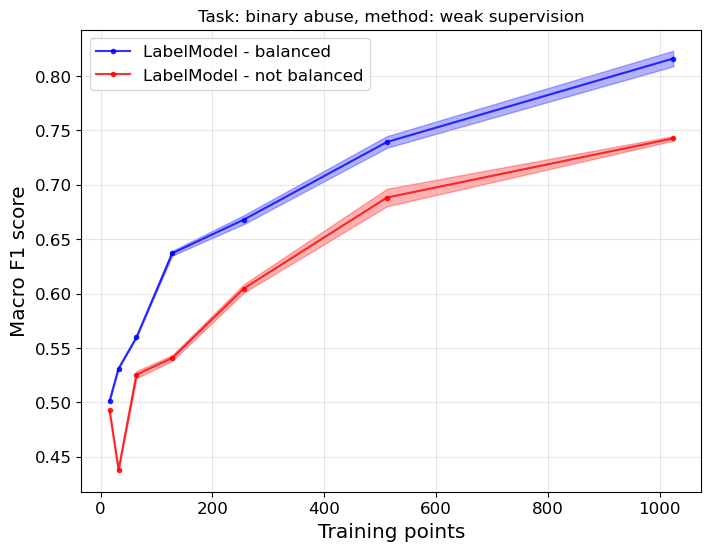

In [9]:
figsize = (8, 6)
plot_learning_curve(task, method, models, n_trains, seeds, dataset, figsize)

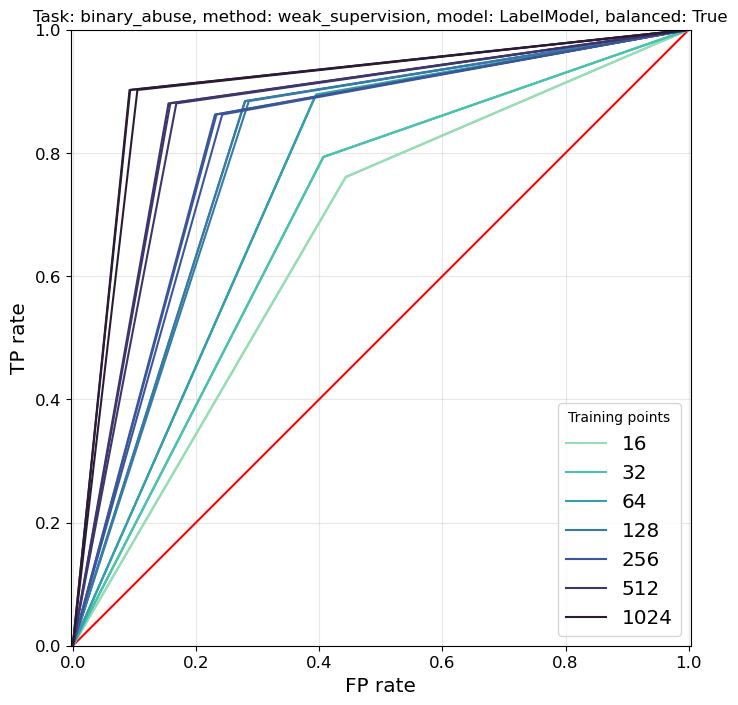

In [10]:
figsize=(8,8)
balanced=True

plot_roc_ntrains(task, method, model, n_trains, seeds, balanced, dataset, figsize)

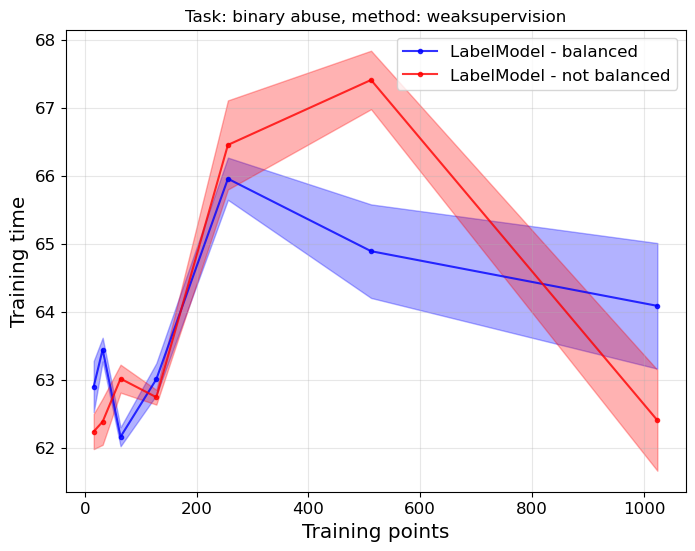

In [11]:
figsize=(8, 6)
plot_times(task, method, models, n_trains, seeds, balanced, dataset, figsize)

# Deprecated

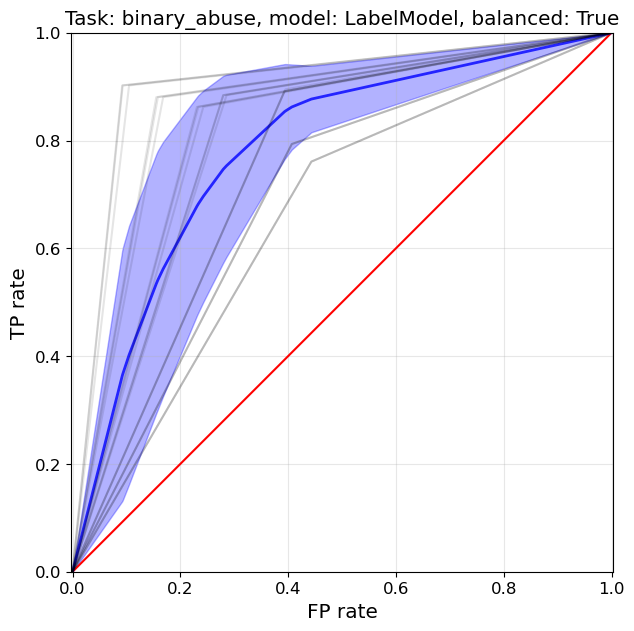

In [13]:
balanced = True
figsize = (7, 7)
alpha=0.8

plot_roc_curves(task, model, n_trains, seeds, balanced, dataset, figsize, alpha)